# The simplest, SIR model

In this tutorial, a basic mathematical model of infectious disease is presented.
The population is divided into the compartments S, I, or R, (Susceptible, Infectious, or Recovered).
During the process, individuals may move between the compartments.

## Dictionary

Let us denote:

* $S$ - Susceptible

* $I$ - Infected

* $R$ - Recovered

* $N=S+I+R$ - total pupulation

* $\beta$ - the average number of contacts per person per day (supposing "day" is the time unit).

* $\gamma$ - Between I and R, the transition rate is γ (simply the rate of recovery, that is, number of recovered during one day). If the duration of the infection is denoted as D, then γ = 1/D, since an individual experiences one recovery in D units of time.

* $R_{0}=\frac {\beta }{\gamma }$ - basic reproduction number

## Draw probability with replacement

### Susceptible

Consider the total number contacts between people (draw with replacement - "losowanie ze zwracaniem") which may lead to the spread of disease.
It is equal to the number of infected persons, $I$, and each infected person has $\beta$ contacts (meetings with other people).
Probability of meeting a susceptible person by an infetced one is $ \frac{S}{N} $.
Finally, the equation reads:

$$
\frac{\partial}{\partial t} S = - \beta \frac{S}{N}I.
$$

### Infected

The rate of change of infected people consists of those who get infected and those who recovered.

$$
\frac{\partial}{\partial t} I = \beta \frac{S}{N}I - \gamma I
$$

### Recovered

$$
\frac{\partial}{\partial t} R = \gamma I
$$

## Numbers or fractions?

Notice that $\frac{S}{N}$ corresponds to the fraction of susceptible in the total population.
Dividing each of the equations by $N$, the SIR system can be described in terms of fractions instead of numbers: 

\begin{align*}
\frac{\partial}{\partial t} s &= - \beta s i \\
\frac{\partial}{\partial t} i &= \beta s i - \gamma i \\
\frac{\partial}{\partial t} r &= \gamma i
\end{align*}


## The nondimensional form equations

If we rescale the time as $\tau = \gamma t$, then the set of equations can be described by single similarity number:

$R_{0}=\frac {\beta }{\gamma }$ - basic reproduction number. 
It is a measure of contagiousness, i.e, the number of secondary infections each infected individual produces.

\begin{align*}
\frac{\partial}{\partial \tau} s &= - R_0 s i \\
\frac{\partial}{\partial \tau} i &= R_0 s i -  i \\
\frac{\partial}{\partial \tau} r &= i
\end{align*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.integrate import solve_ivp

## Task

Implement the body of `SIR_0D(t, z, beta, gamma, N)` function.


In [2]:
def SIR_0D(t, z, beta, gamma, N):
    """
     # Susceptible → Infected → Removed
    :param t: time [days]
    :param z: Susceptible, Exposed, Infected, Removed
    :param beta: average number of contacts per day for each infected individual
    :param gamma: Between I and R, the transition rate is γ
    (simply the frequency of recoveries, that is, number of recovered or dead during one day
    divided by the total number of infected on that same day, supposing "day" is the time unit).
    If the duration of the infection is denoted D, then γ = 1/D.
    :return: derivatives [dS, dI, dR]
    """

    S, I, R = z
    dSdt = -beta*I*S/N
    dIdt = beta*I*S/N - I*gamma
    dRdt = I*gamma
    return [dSdt, dIdt, dRdt]

Now, run the simulation for different diseases and initial conditions:

```
A) 
beta = 0.71  # number of contacts per day 
gamma = 1/2.8  # 1 over days to recovery
initial_susceptible = 0.9*N  # initial number of susceptible individuals in population.
initial_infections = 0.1*N  # initial number of infected individuals in population.

B) 
beta = 0.71  # number of contacts per day 
gamma = 1/2.8  # 1 over days to recovery
initial_susceptible = 0.99*N  # initial number of susceptible individuals in population.
initial_infections = 0.01*N  # initial number of infected individuals in population.

C) 
beta = 10*0.71  # number of contacts per day 
gamma = 1/2.8  # 1 over days to recovery
initial_susceptible = 0.9*N  # initial number of susceptible individuals in population.
initial_infections = 0.1*N  # initial number of infected individuals in population.
```

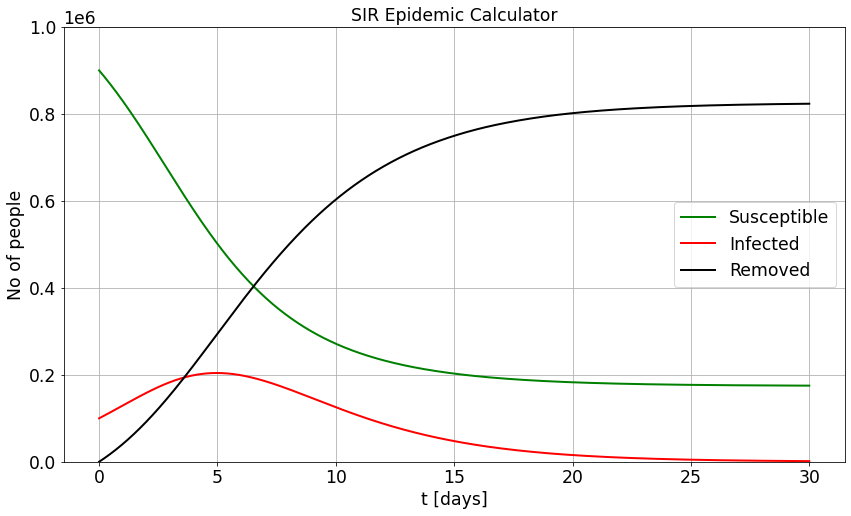

In [3]:
# CONSTANTS
N = 1e6  # Size of population [no of people].
beta = 0.71  # number of contacts per day 
gamma = 1/2.8  # 1 over days to recovery

# INITIAL CONDItIONS
initial_susceptible = 0.9*N  # initial number of susceptible individuals in population.
initial_infections = 0.1*N  # initial number of infected individuals in population.
initial_removed = 0  # initial number of removed (recovered) individuals in population.
IC = np.array([initial_susceptible, initial_infections, initial_removed])

days_to_simulate = 30
sol = solve_ivp(SIR_0D,
                [0, days_to_simulate],
                IC,
                method='RK23',
                args=[beta, gamma, N],
                dense_output=True)

t = np.linspace(0, days_to_simulate, 1000)
z = sol.sol(t)

S, I, R = z

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (14, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
axes = plt.gca()
plt.plot(t, S,
         color="green", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
         label='Susceptible')
plt.plot(t, I,
         color="red", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
         label='Infected')
plt.plot(t, R,
         color="black", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
         label='Removed')


plt.xlabel('t [days]')
plt.ylabel('No of people')
axes.set_ylim([0,N])
plt.title('SIR Epidemic Calculator')
plt.legend()
plt.grid()
plt.show()


## Conclusions

- Q1: Are there scenarios in which some of the population may survive the epidemic with non infected status?

- A1: Yes!

## Inspirations

* <http://gabgoh.github.io/COVID/index.html?fbclid=IwAR2VJC06vWXCwTKuwC0-DdkhqJGjzlIdZAWFtsII5wn7VWbItlTXONmChNQ>
* <https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model>
* <https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model>
